Inspiration: Udemy "Customer Analytics in Python" Link: https://www.udemy.com/course/customer-analytics-in-python/

Context: Segment customers into different categories based on their characteristics.

Methods Used: K-means - Group customers based on shared/similar features.
             PCA - Downsize dimensions, represented by principal components.     
             
Results: K-means + PCA allows to focused on the key patterns - For further analysis(like campaign purpose)

𝐋𝐢𝐛𝐫𝐚𝐫𝐢𝐞𝐬

In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import pickle

𝐈𝐦𝐩𝐨𝐫𝐭 𝐃𝐚𝐭𝐚

In [2]:
df_segmentation=pd.read_csv("segmentation data.csv",index_col=0)

𝐄𝐱𝐩𝐥𝐨𝐫𝐞 𝐃𝐚𝐭𝐚

In [3]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
df_segmentation.corr().round(2)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.00,0.57,-0.18,0.24,-0.20,-0.20,-0.30
Marital status,0.57,1.00,-0.21,0.37,-0.07,-0.03,-0.10
Age,-0.18,-0.21,1.00,0.65,0.34,0.11,0.12
Education,0.24,0.37,0.65,1.00,0.23,0.06,0.03
Income,-0.20,-0.07,0.34,0.23,1.00,0.68,0.49
Occupation,-0.20,-0.03,0.11,0.06,0.68,1.00,0.57
Settlement size,-0.30,-0.10,0.12,0.03,0.49,0.57,1.00


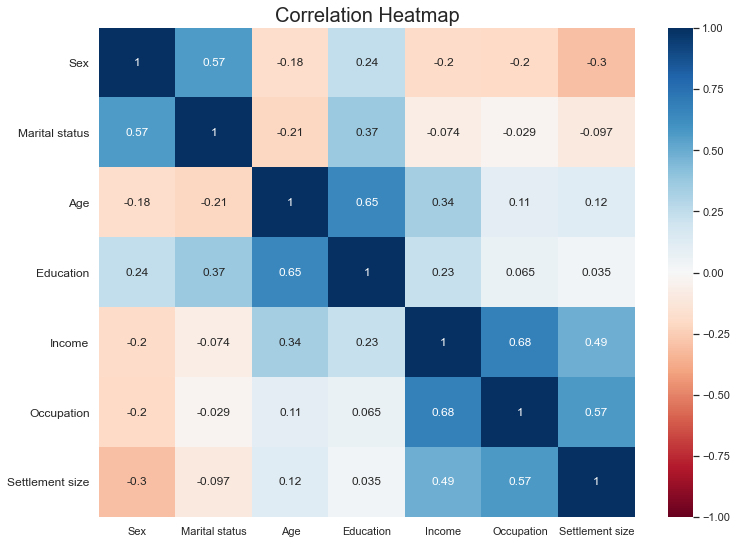

In [6]:
plt.figure(figsize=(12,9))
s=sns.heatmap(df_segmentation.corr(),
              annot=True, # annotation
              cmap='RdBu', # colormap
              vmin=-1, # value min
              vmax=1) # value max

# Retrieving and setting tick labels with rotation
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(),rotation=0)

plt.title('Correlation Heatmap', fontsize=20)
plt.show()

𝐕𝐢𝐬𝐮𝐚𝐥𝐢𝐳𝐞 𝐑𝐚𝐰 𝐃𝐚𝐭𝐚

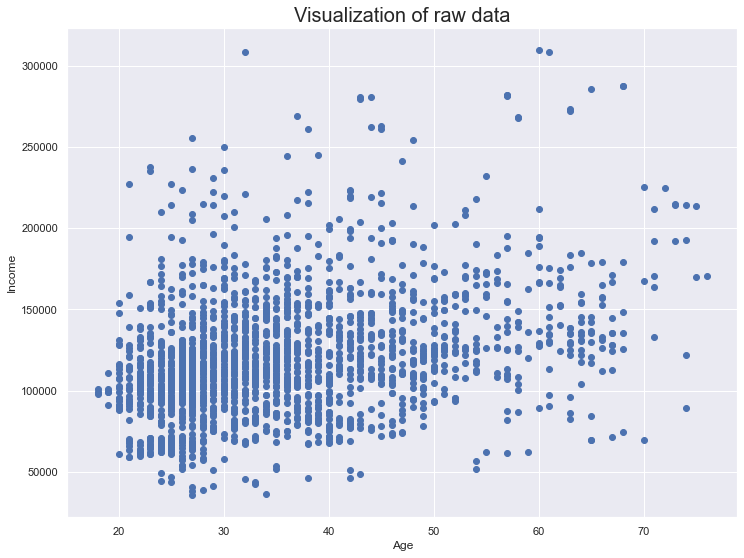

In [7]:
plt.figure(figsize=(12,9))
plt.scatter(df_segmentation.iloc[:,2],df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data',fontsize=20);

𝐒𝐭𝐚𝐧𝐝𝐚𝐫𝐝𝐢𝐳𝐚𝐭𝐢𝐨𝐧

In [8]:
scaler=StandardScaler()
segmentation_std=scaler.fit_transform(df_segmentation)

𝐇𝐢𝐞𝐫𝐚𝐫𝐜𝐡𝐢𝐜𝐚𝐥 𝐂𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠

In [9]:
hier_clust=linkage(segmentation_std,method='ward')
# https://www.youtube.com/watch?v=7xHsRkOdVwo
# Step 1: 
# we need to define what similarity means.
# the method for determing similarity is arbitrarily chosen. However, the Euclidian distance betweens genes
# is used alot.
# using the Euclidian distance vs. Manhattan distance -- choice is arbitrary
# there is no biological or physical reason to choose one and not the other.
# Pick the one that gives more insight into your data.

# Euclidian distance: sqrt((distance in sample #1)2, (distance in sample #2)2 )--
# the hypotenuse is the total distance between gene1 and 2.
# When we have more samples, we just extend the equition. 

# Manhattan distance
# The absolute value of the differences |diff in sample1|+|diff in sample2|+|diff in sample3|
# In geometric term, imagin each diff is line segment, put them together, head to tail, head to tail, and add the 
# total length of all these line segments.

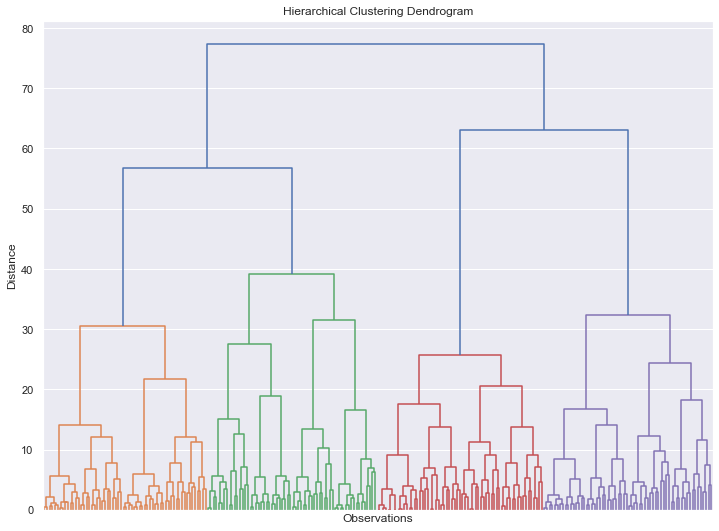

In [10]:
plt.figure(figsize=(12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
          truncate_mode='level',
          p =7,
          show_leaf_counts=True,
          no_labels=True
          )
plt.show()

# dendrogram: Requires plt.show() to visualize the hierarchical clustering, otherwise, 
# it will only show the numerical output.

𝐊-𝐦𝐞𝐚𝐧𝐬 𝐂𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠

In [11]:
wcss=[] #Within-Cluster Sum of Squares  
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)  # KMeans Initialization
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_) 


# Detailed Steps in the Loop:
# Initialization: For each value of i (number of clusters) from 1 to 10, 
#the KMeans algorithm is initialized with i clusters.
# Fitting: The algorithm fits the data, positioning the centroids and assigning data 
#points to the nearest centroid.
# Calculating WCSS: The WCSS value is calculated and stored in the kmeans.inertia_ attribute.
# Appending WCSS: The calculated WCSS value is appended to the wcss list.    

# WCSS Evaluation:
    # WCSS helps in evaluating how well the data points are grouped within their clusters.
    # Lower WCSS indicates more compact clusters.

# Elbow Method:
    # The Elbow Method is used to determine the optimal number of clusters.
    # It identifies the point where increasing the number of clusters does not significantly reduce the WCSS.
    # This point is known as the "elbow" on the WCSS plot.

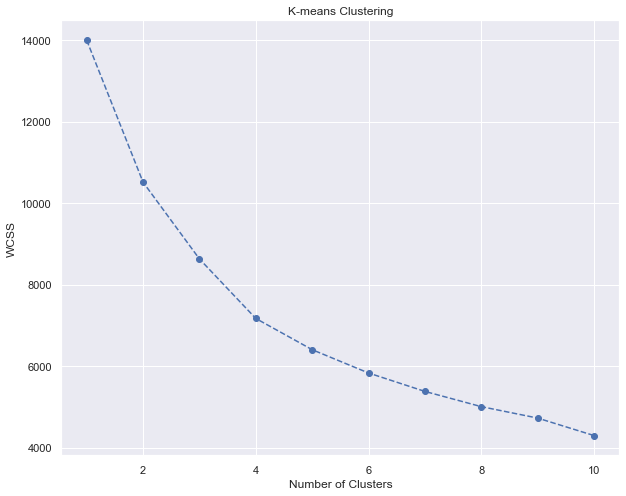

In [12]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show() 

In [13]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)

In [14]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

𝐑𝐞𝐬𝐮𝐥𝐭𝐬

In [15]:
df_segm_kmeans=df_segmentation.copy()
df_segm_kmeans['Segmentation K-means']=kmeans.labels_

In [16]:
df_segm_analysis= df_segm_kmeans.groupby(['Segmentation K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segmentation K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [17]:
df_segm_analysis['N Obs'] = df_segm_kmeans.groupby(['Segmentation K-means']).size()
#The .size() method returns a Series with the counts of rows for each group.
df_segm_analysis['Prob Obs']=df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()

In [18]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prob Obs
Segmentation K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [19]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prob Obs
Segmentation K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [20]:
df_segm_kmeans['Labels']=df_segm_kmeans['Segmentation K-means'].map({0:'well-off',
                                                                     1:'fewer-opportunities',
                                                                     2:'standard',
                                                                     3:'career focused'})

In [21]:
df_segm_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segmentation K-means,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,well-off
100000002,1,1,22,1,150773,1,2,2,standard
100000003,0,0,49,1,89210,0,0,1,fewer-opportunities
100000004,0,0,45,1,171565,1,1,3,career focused
100000005,0,0,53,1,149031,1,1,3,career focused
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,fewer-opportunities
100001997,1,1,27,1,117744,1,0,2,standard
100001998,0,0,31,0,86400,0,0,1,fewer-opportunities


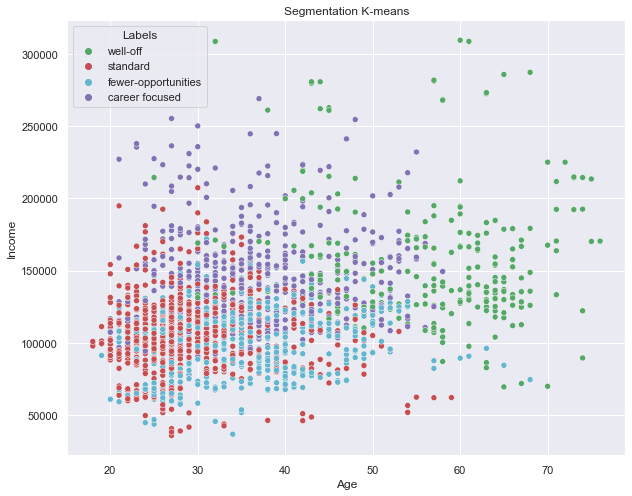

In [22]:
plt.figure(figsize=(10,8))
x_axis=df_segm_kmeans['Age']
y_axis=df_segm_kmeans['Income']
sns.scatterplot(x=x_axis,y=y_axis,hue=df_segm_kmeans['Labels'],palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show();

𝐏𝐂𝐀

In [23]:
pca=PCA() #Initialize PCA Object,  for dimensionality reduction

In [24]:
pca.fit(segmentation_std) #Fit the PCA Model
#This line fits the PCA model to the standardized data segmentation_std. 
#It calculates the principal components from the data.

PCA()

In [25]:
pca.explained_variance_ratio_ # Explained Variance Ratio
#This attribute returns the variance ratio of each principal component (accounts to 100%). 
#The variance ratio indicates how much of the total variance in the data is 
#explained by each principal component.

# This array shows the proportion of the total variance explained by each principal component:
#First Principal Component: Explains 35.7% of the variance.

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

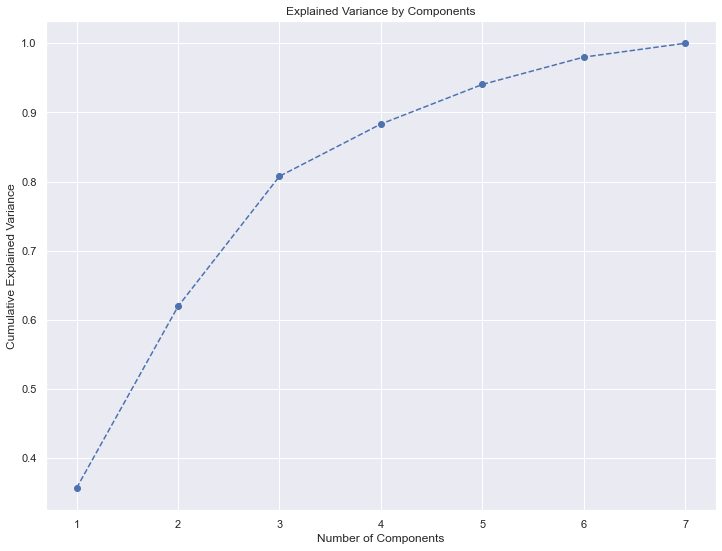

In [26]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

In [27]:
pca=PCA(n_components=3)

In [28]:
pca.fit(segmentation_std)

PCA(n_components=3)

𝐏𝐂𝐀 𝐑𝐞𝐬𝐮𝐥𝐭𝐬

In [29]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [30]:
df_pca_comp=pd.DataFrame(data=pca.components_,
                        columns=df_segmentation.columns.values, 
                         index=['Component 1', 'Component 2', 'Component 3'])
df_pca_comp
# PCA is used for dimensionality reduction
# PCA explores correlations/covariances between columns
# Principal components are independent patterns
# Each component is a linear combination of the original columns

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


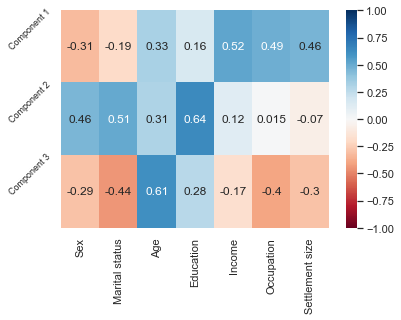

In [31]:
sns.heatmap(df_pca_comp,
           vmin=-1,
           vmax=1,
           cmap='RdBu',
           annot=True)

plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9);

In [32]:
pca.transform(segmentation_std)
#Rows: original standardized dataset.
# Columns/the new axes: principal components 1-3 (PC1, PC2, PC3, etc.)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [33]:
scores_pca = pca.transform(segmentation_std)

𝐊-𝐦𝐞𝐚𝐧𝐬 𝐜𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠 𝐰𝐢𝐭𝐡 𝐏𝐂𝐀

In [34]:
wcss=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

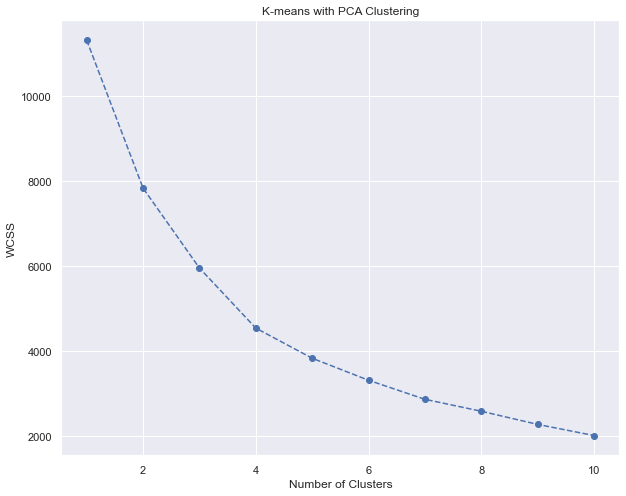

In [35]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [36]:
kmeans_pca=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

𝐊-𝐦𝐞𝐚𝐧𝐬 𝐜𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠 𝐰𝐢𝐭𝐡 𝐏𝐂𝐀 𝐑𝐞𝐬𝐮𝐥𝐭𝐬

In [37]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [38]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [39]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [40]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [41]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})

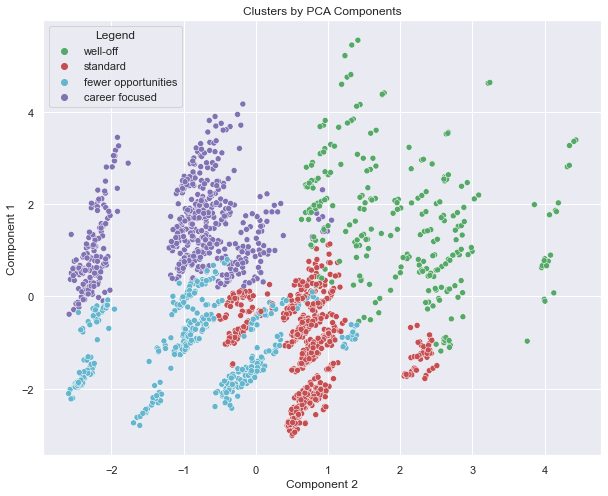

In [42]:
plt.figure(figsize = (10, 8))
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

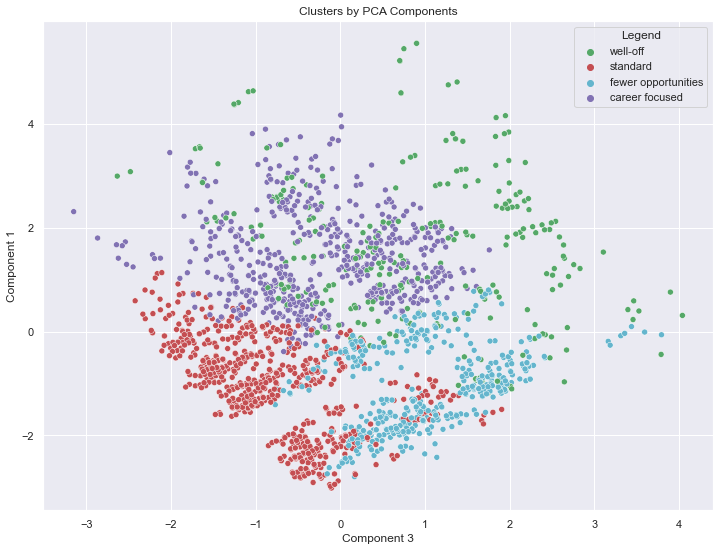

In [43]:
x_axis_1 = df_segm_pca_kmeans['Component 3']
y_axis_1 = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (12, 9))
sns.scatterplot(x=x_axis_1, y=y_axis_1, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components' )
plt.show()

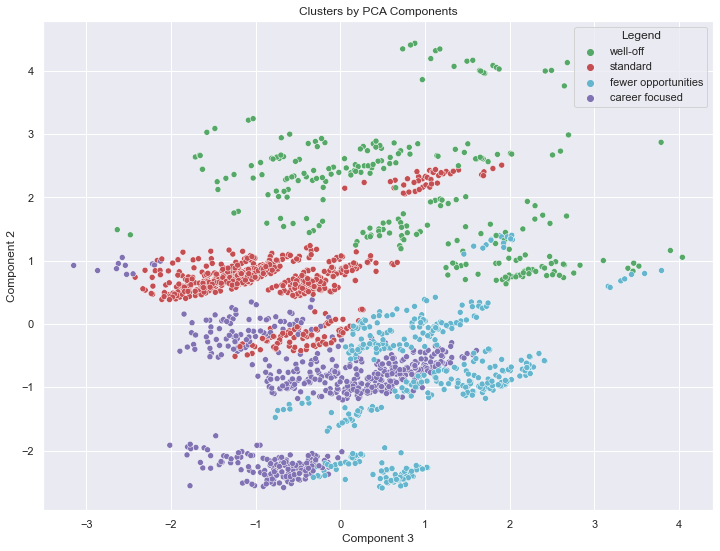

In [44]:
x_axis_1 = df_segm_pca_kmeans['Component 3']
y_axis_1 = df_segm_pca_kmeans['Component 2']
plt.figure(figsize = (12, 9))
sns.scatterplot(x=x_axis_1, y=y_axis_1, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components' )
plt.show()

𝐃𝐚𝐭𝐚 𝐄𝐱𝐩𝐨𝐫𝐭

In [45]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [46]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [47]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))

In [48]:
hier_clust

array([[4.78000000e+02, 1.95700000e+03, 3.41213651e-04, 2.00000000e+00],
       [6.73000000e+02, 8.21000000e+02, 3.93708059e-04, 2.00000000e+00],
       [8.67000000e+02, 9.33000000e+02, 8.92404934e-04, 2.00000000e+00],
       ...,
       [3.99200000e+03, 3.99500000e+03, 5.67337517e+01, 1.18000000e+03],
       [3.99000000e+03, 3.99400000e+03, 6.30691755e+01, 8.20000000e+02],
       [3.99600000e+03, 3.99700000e+03, 7.73495855e+01, 2.00000000e+03]])